# PARKINSON'S DISEASE: 
# PROGNOSIS AND DETECTION USING MACHINE LEARNING 
> ### It is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain. 

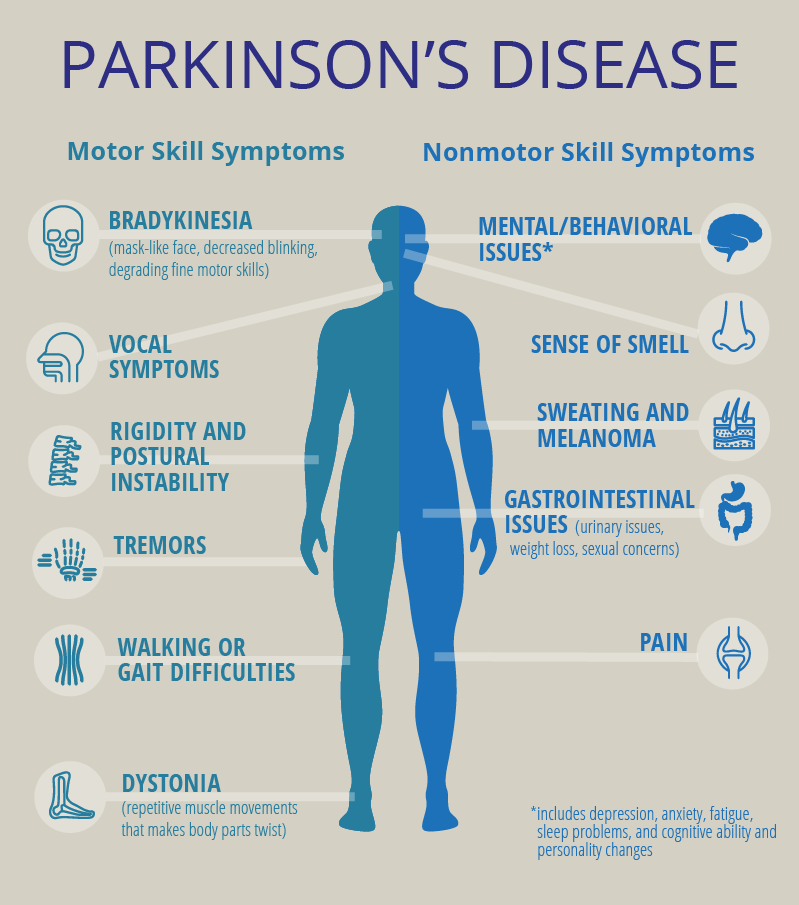

## IMPORTING ESSENTIAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## LOADING THE DATASET (USING PANDAS)

In [2]:
df = pd.read_csv('parkinsons.csv')

## EXPLORING THE DATASET 

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
df.shape

(195, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## CHECKING FOR NULL VALUES

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## PERFORMING EDA (EXPLORATORY DATA ANALYSIS)

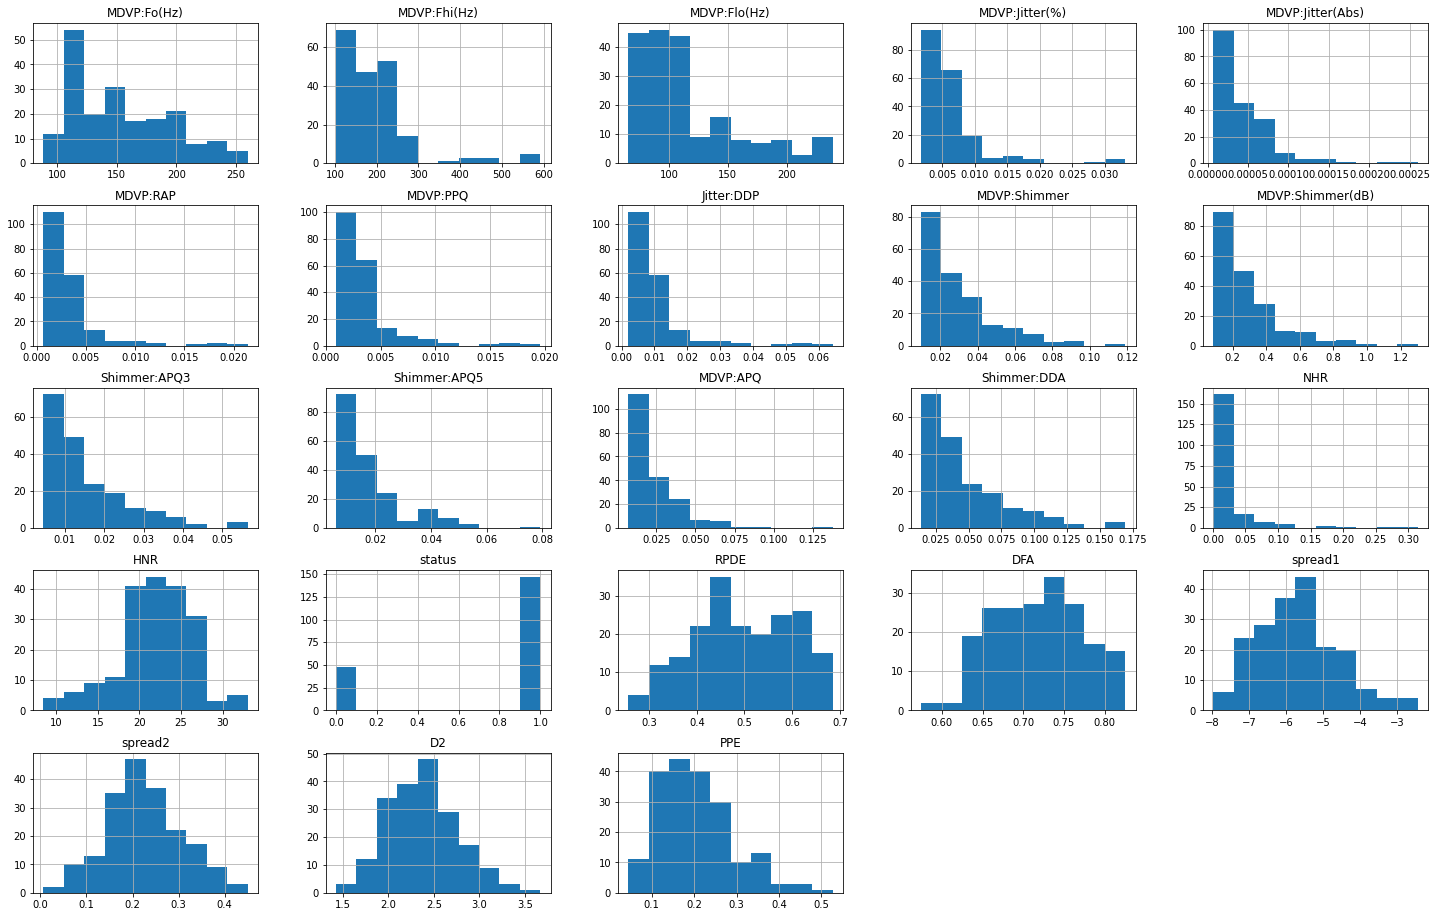

In [9]:
df.hist(figsize=(25,16))
plt.show()

## GETTING FEATURES AND LABELS FROM THE DATAFRAME 
> ### features are all the columns except ‘status’, and labels are those in the ‘status’ column

In [10]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [11]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [12]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

## SPLITTING THE DATASET INTO TRAINING AND TESTING SETS
> ### keeping 20% [0.2] of the data for testing

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

## BUILDING THE XGBOOST MODEL

In [14]:
model = XGBClassifier(learning_rate=0.1, max_depth=10,
                    scale_pos_weight=1.5, eval_metric='mlogloss')

In [15]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred=model.predict(x_test)

## ESTIMATING THE ACCURACY OF THE MODEL

In [17]:
print('The accuracy of the XGBoost classifier on training data is : {:.2f}'.format(model.score(x_train, y_train)*100))
print('The accuracy of the XGBoost classifier on test data is : {:.2f}'.format(model.score(x_test, y_test)*100))

The accuracy of the XGBoost classifier on training data is : 100.00
The accuracy of the XGBoost classifier on test data is : 94.87


In [18]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predicted Healthy',
            'Predicted Parkinsons'],
            index=['True Healthy', 'True Parkinsons'])

,Predicted Healthy,Predicted Parkinsons
True Healthy,5,2
True Parkinsons,0,32


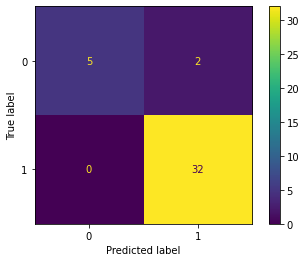

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## PREDICTION USING CUSTOM VALUES

In [20]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,
              0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,
              0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,
              0.177551,1.743867,0.085569)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)

print(prediction)

if (prediction[0] == 0):
    print("The person does not have Parkinson's")

else:
    print("The person has Parkinson's")

[0]
The person does not have Parkinson's


## COMPARISON WITH OTHER MODELS

### SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
print('The accuracy of the SVM classifier on training data is : {:.2f}'.format(svm.score(x_train, y_train)*100))
print('The accuracy of the SVM classifier on test data is : {:.2f}'.format(svm.score(x_test ,y_test)*100))

The accuracy of the SVM classifier on training data is : 85.90
The accuracy of the SVM classifier on test data is : 87.18


### DECISION TREE CLASSIFIER

In [22]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train, y_train)
print('The accuracy of the Decision Tree classifier on training data is : {:.2f}'.format(decision_tree.score(x_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is : {:.2f}'.format(decision_tree.score(x_test, y_test)*100))

The accuracy of the Decision Tree classifier on training data is : 100.00
The accuracy of the Decision Tree classifier on test data is : 84.62


### NAIVE BAYES CLASSIFIER

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train , y_train)
print('The accuracy of the GaussianNB classifier on training data is : {:.2f}'.format(nb.score(x_train, y_train)*100))
print('The accuracy of the GaussianNB classifier on test data is : {:.2f}'.format(nb.score(x_test, y_test)*100))

The accuracy of the GaussianNB classifier on training data is : 70.51
The accuracy of the GaussianNB classifier on test data is : 71.79


# SUMMARY
> ### Parkinson’s affects the CNS of the brain and has yet no treatment unless it is detected early. Late detection leads to no treatment and loss of life. 
> ### For early detection of the disease, we utilized a machine learning algorithm known as XGBoost which gives us an accuracy of 94.87%.
> ### To conclude, it can be said that XGBoost is the best algorithm to discover the early onset of the disorder in one's body for timely treatment.